In [22]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

import seaborn as sns
import cufflinks as cf
import plotly.offline as iplot
import matplotlib.pyplot as plt
cf.go_offline()

**`Urllib package` is the URL handling module for python.** It is used to fetch URLs (Uniform Resource Locators). It uses the urlopen function and is able to fetch URLs using a variety of different protocols.

In [2]:
### Data source

download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_url = download_root + "datasets/housing/housing.tgz"
housing_path = os.path.join("datasets", "housing")

In [3]:
# getting out from the notebook dir

os.chdir("..")

In [4]:
pwd

'D:\\data-science\\projects\\california-housing-price-prediction'

In [4]:
## Creating a function to fetch the housing-dataset.

def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
    """
    A function to fetch the housing-dataset.
    """
    # making the directories to save the consequent dataset
    os.makedirs(housing_path, exist_ok=True)
    
    tgz_path = os.path.join(housing_path, "california_housing.tgz")
    
    # retrieving the dataset files
    urllib.request.urlretrieve(housing_url, filename=tgz_path)
    
    # opening the downloaded files, and the extraction
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
print(os.path.join(housing_path, "housing.tgz"))

datasets\housing\housing.tgz


In [6]:
housing_url

'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'

In [7]:
# calling the function

fetch_housing_data()

### # Loading the `housing` dataset:

In [8]:
def load_housing_data(data_dir):
    """
    A function to load the downloaded `housing` dataset
    """
    data_path = os.path.join(data_dir, "housing.csv")
    return pd.read_csv(data_path)

df = load_housing_data(data_dir=housing_path)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
## Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
## bird-eye view of visualization

df.iplot(kind="hist", subplots=True)

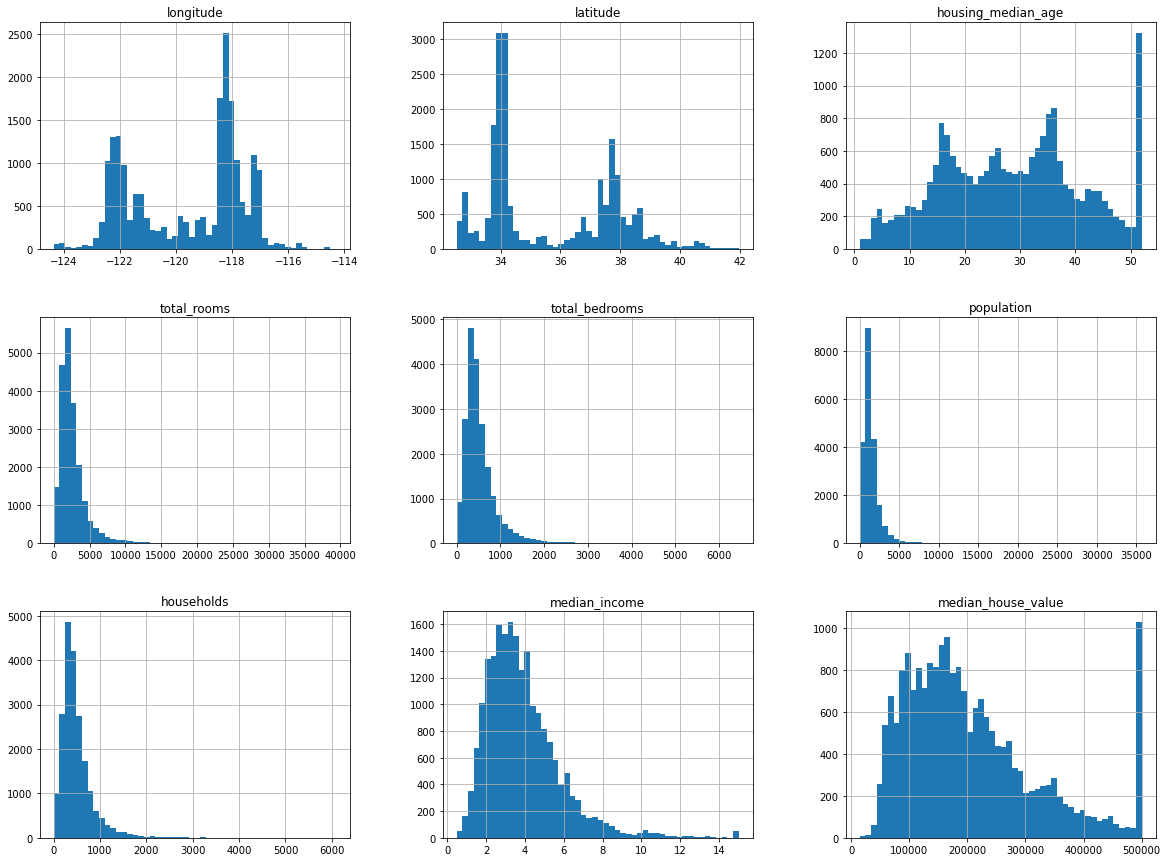

In [12]:
## Visuals by matplotlib

import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [15]:
## Having a look at our only categorical attribute

df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# description of the dataset

df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### # Findings:

- Our target column `median_house_value` is capped i.e. higher values beyond 500,000 are capped to 500,000 which means that at the time of training the machine learning model will learn this biased relation and at the time of prediction won't give us values beyond 500,000 where they should actually be.

### # Solutions:

- Collect proper labels for districts whose labels were capped.
- Remove those distrcits from training as well as test set. `Why from test set?` Because our system shouldn't evaluate our model poorly if it actually gives correct values beyond 500,000.

## # Preparing the test set (and never looking at it before the time of prediction! `:)`)

In [13]:
## Randomly permute a sequence and returning a permuted range ## SHUFFLING

x = np.random.permutation(len(df))
x

array([ 1489,  9363, 13686, ..., 16359,  3685,  7305])

In [14]:
def train_test_split(data, test_ratio, random_state=100):
    
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
# Splitting

train_set, test_set = train_test_split(data=df, test_ratio=.2)

In [16]:
## Our training set

print(len(train_set))
train_set

16512


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3278     -122.70     39.14                13.0        532.0           111.0   
16630    -120.83     35.32                11.0       3252.0           701.0   
18748    -122.31     40.49                18.0       4026.0           718.0   
14961    -116.92     32.76                 7.0       1659.0           237.0   
1740     -122.34     37.97                19.0       2237.0           580.0   
...          ...       ...                 ...          ...             ...   
16304    -121.37     38.01                15.0       2430.0           315.0   
79       -122.28     37.80                38.0        684.0           176.0   
12119    -117.21     33.97                 3.0      18356.0          2537.0   
14147    -117.08     32.74                35.0       1434.0           253.0   
5640     -118.30     33.75                48.0       1958.0           386.0   

       population  households  median_income  median_house_value  \
3278        214.0        62.0         3.3929            108300.0   
16630      1814.0       660.0         3.2226            183200.0   
18748      1731.0       705.0         3.3500            118400.0   
14961       862.0       242.0         5.2741            249400.0   
1740       1438.0       551.0         2.3382            120700.0   
...           ...         ...            ...                 ...   
16304      1016.0       314.0        10.0088            242000.0   
79          344.0       155.0         2.0114            131300.0   
12119      8437.0      2342.0         5.6409            197700.0   
14147       753.0       228.0         2.3812            135100.0   
5640       1098.0       380.0         4.6250            273400.0   

      ocean_proximity  
3278           INLAND  
16630      NEAR OCEAN  
18748          INLAND  
14961       <1H OCEAN  
1740         NEAR BAY  
...               ...  
16304          INLAND  
79           NEAR BAY  
12119          INLAND  
14147      NEAR OCEAN  
5640        <1H OCEAN  

[16512 rows x 10 columns]

## # Creating a test_set using `Stratified Sampling`:

In [17]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Say, we are being told that `median income` is a very important attribute to predict teh `median housing prices`. **Now, we gotta ensure that the test set is representative of the various categories of incomes in the whole dataset.**

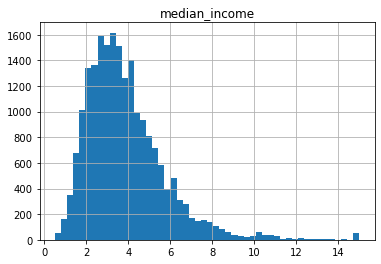

In [21]:
## Let's have a closer look at the `median income` feature

df['median_income'].hist(bins=50)
plt.title("median_income")
plt.show()

- Most median income values are clustered  around 1.5 to 6 (i.e 15,000 - 60,000), and at the same time some median incomes go far beyond 6.
- **It is important to have a sufficient number of instances in your dataset for each `stratum`, or else the estimate of a stratum's importance may be biased.**

In [18]:
### Creating an income category attribute with five categories (labeled from 1 to 5)

df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

In [20]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [41]:
## values_counts() of `income_cat`

import plotly.express as px

fig = px.histogram(df, x="income_cat", barmode="group", nbins=9)
fig.show()

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

In [44]:
## Stratified ShuffleSplit cross-validator
# Provides train/test indices to split data in train/test sets.

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [48]:
## Generating indices to split data into training and test set.

for train_index, test_index in split.split(X=df, y=df['income_cat']): # stratification is done based on the y labels
#     print(train_index)
#     print(test_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [49]:
## `income_cat` categories proportions

df['income_cat'].value_counts() * 100 / len(df)

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [51]:
### `income_cat` proportions in strat_test_set

strat_test_set['income_cat'].value_counts()/len(strat_test_set) * 100

3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: income_cat, dtype: float64

=> Almost perfect sampling!

In [52]:
### now removing the feature `income_cat` from our stratified sets:

for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=['income_cat'], inplace=True)

In [53]:
## Setting the test set aside for now

strat_test_set.to_csv("strat_test_set.csv", index=None)

In [54]:
ls

 Volume in drive D is Local Disk 
 Volume Serial Number is 407D-3EE5

 Directory of D:\data-science\projects\california-housing-price-prediction

29-10-2022  20:56    <DIR>          .
29-10-2022  20:56    <DIR>          ..
28-10-2022  20:36             3,078 .gitignore
29-10-2022  20:56    <DIR>          .ipynb_checkpoints
26-10-2022  22:13    <DIR>          datasets
06-11-2022  14:34    <DIR>          notebooks
26-10-2022  21:26                50 requirements.txt
06-11-2022  14:34           288,940 strat_test_set.csv
               3 File(s)        292,068 bytes
               5 Dir(s)  88,127,479,808 bytes free


# # Exploring the data:

In [55]:
## Creating a copy of the training set so as no changes are reflected

df1 = strat_train_set.copy(deep=True)

### Note: df1 is our copy of `Stratified Test Set`!

In [56]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

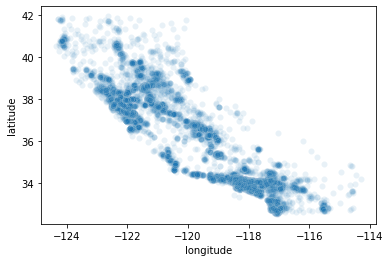

In [57]:
## Visualizing the geographical data

sns.scatterplot(data=df1, x='longitude', y='latitude', alpha=.1)

### Note: Setting `alpha = .1` makes it much easier to visualize the places where there is a high density of data points.

In [61]:
df1.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN

In [62]:
## looking at housing prices location-wise

import plotly as ply
import plotly.express as px

fig = px.scatter_mapbox(data_frame=df1, lat="latitude", lon="longitude", color="median_house_value", 
                        size=df1["population"], color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=5,
                        mapbox_style="carto-positron")
fig.show()

**Observation**: The housing prices are very much related to the location (eg. close to the ocean) and to the population density.

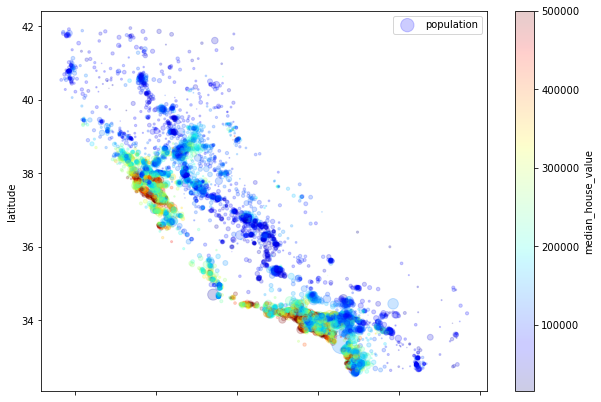

In [65]:
## looking at housing prices location-wise

df1.plot(kind='scatter', x='longitude', y='latitude', alpha=.2, s=df1['population']/100, label="population", figsize=(10,7)
        , c="median_house_value", cmap=plt.get_cmap("jet"))
plt.legend()
plt.show()

# # Looking for Correlations:

In [66]:
corrs = df.corr()
corrs

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [67]:
### Let's check how much each attribute correlates w the `median_house_value`:

corrs["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

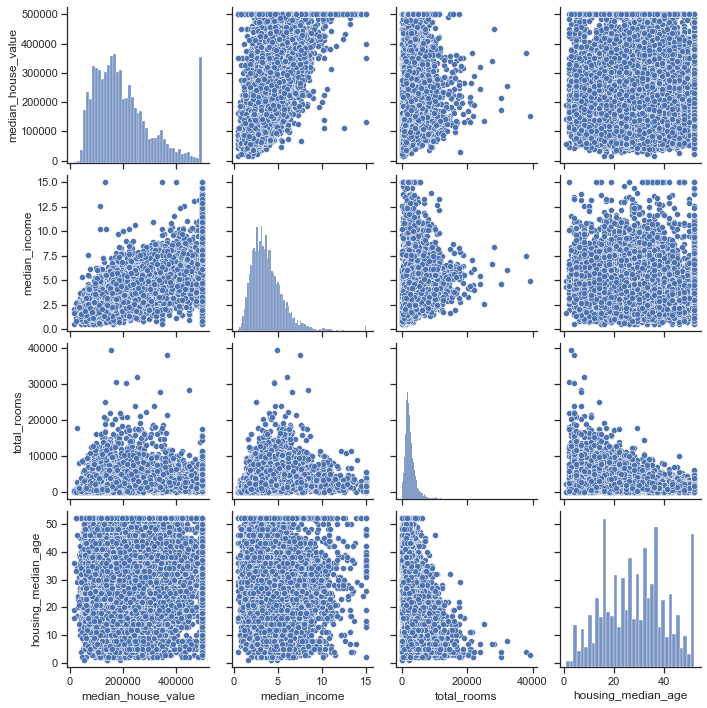

In [68]:
## Let's have a visual look at the correlations

import seaborn as sns
sns.set_theme(style="ticks")

relevant_featues = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(df1[relevant_featues])

### The most promising attribute to predict the `median house value` is `median income`. Let's zoom in on it:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

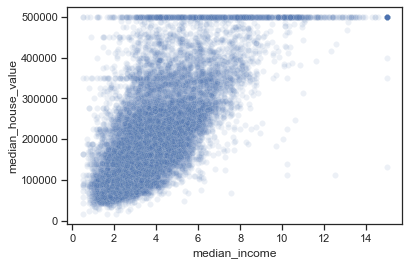

In [69]:
sns.scatterplot(data=df1, x='median_income', y='median_house_value', alpha=.1)

### Observations:

- The `correlation` is indeed very strong.
- The price cap we noticed earlier is clearly visible as a horizontal line at \$500,000.
- A horizontal line around \$450,000.
- Again at \\$350,000 and \$280,000.

**=> The corrosponding districts are advisable to be removed to prevent our algorithms from learning to reproduce these data quirks.**

In [70]:
df1.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN

## # Experimenting with Attribute Combinations: 

In [71]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [72]:
df1.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN

### Mundane columns by themselves:

* **Total number of rooms**, rather than number of rooms per household.
* **Total number of bedrooms**, rather than number of bedrooms per rooms.
* **population** istead of popluation per household.

In [94]:
## Newer and meaningful attributes

# number of rooms per household
df1["rooms_per_household"] = df1["total_rooms"]/df1["households"]

# number of bedrooms per rooms
df1["bedrooms_per_room"] = df1["total_bedrooms"]/df1["total_rooms"]

# population per houshold
df1["population_per_household"] = df1["population"]/df1["households"]

In [95]:
## Features w new attributes

df1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
...           ...         ...            ...                 ...   
15174      2026.0      1001.0         5.0900            268500.0   
12661      4769.0      1418.0         2.8139             90400.0   
19263       458.0       172.0         3.1797            140400.0   
19140      1208.0       501.0         4.1964            258100.0   
19773       625.0       197.0         3.1319             62700.0   

      ocean_proximity  population_per_household  bedrooms_per_room  \
12655          INLAND                  3.168555           0.205784   
15502      NEAR OCEAN                  2.623698           0.160714   
2908           INLAND                  2.223333           0.191595   
14053      NEAR OCEAN                  1.859213           0.276505   
20496       <1H OCEAN                  3.167241           0.182692   
...               ...                       ...                ...   
15174       <1H OCEAN                  2.023976           0.184696   
12661          INLAND                  3.363188           0.179977   
19263       <1H OCEAN                  2.662791           0.234795   
19140       <1H OCEAN                  2.411178           0.183835   
19773          INLAND                  3.172589           0.205746   

       rooms_per_household  
12655             5.485836  
15502             6.927083  
2908              5.393333  
14053             3.886128  
20496             6.096552  
...                    ...  
15174             6.658342  
12661             5.571932  
19263             4.110465  
19140             6.297405  
19773             5.477157  

[16512 rows x 13 columns]

In [101]:
## Let's now look at the new correlations

df1.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>

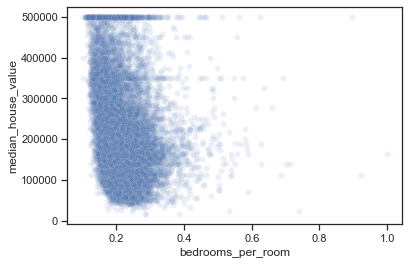

In [102]:
sns.scatterplot(data=df1, x="bedrooms_per_room", y="median_house_value", alpha=0.1)

### Findings:

* Apparently houses with lower bedroom/room ratio tends to be more expensive.
* And the houses w more number of rooms seems to be more expensive, obviously.

## # Preparing the data for Machine Learning Algorithms:

In [109]:
## Separating the columns and labels

X = strat_train_set.drop("median_house_value", axis=1)
Y = strat_train_set["median_house_value"]

### # Missing Vals:

In [112]:
## features

X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [113]:
## Let's impute the na vals by the median of the missing featues accordingly

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [116]:
## dropping the cat. attribute to compute the median

X_num = X.drop("ocean_proximity", axis=1)
X_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964

In [117]:
### Fitting the numerical data to the imputor

imputer.fit(X_num)

SimpleImputer(strategy='median')

**Note:** We applied imputors to all features **despite only `total_bedrooms` having the missing vals**, because we can't be sure that new data won't be having any missing values in other features.

In [118]:
## medians computed by the imputor

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [125]:
## Now we can use this `trained imputor` to transform the training set by replacing 
# missing values by the median of the corrosponding cols

X_ = pd.DataFrame(imputer.transform(X_num), columns=X_num.columns, index=X_num.index)
X_

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]